# EDA Bluesky Stats Data
Comenzamos por un análisis exploratorio de los datos de estadísticas y número de usuarios que hemos obtenido de Bluesky.

## Dataset
- 3172 registros
- 18 columnas:
  - **date**: fecha en formato Y-m-d, va desde 2023-05-08 hasta 2025-04-07
  - **year**: año en que se hace el registro, va desde 2023 hasta 2025, 2 años
  - **month**: mes en que se hace el registro, va desde mayo de 2023 hasta abril 2025, 23 meses
  - **day**: día del mes en que se hace el registro
  - **time**: hora en la que se realiza el registro (contiene nuls)
  - **users**: total agregado de usuarios por día
  - **num_likes**: cantidad de likes que se registran en total en la plataforma ese día
  - **num_likers**: cantidad de usuarios que han dado mínimo un like ese día en la plataforma
  - **num_posters**: cantidad de usuarios que han publicado mínimo un post ese día en la plataforma
  - **num_posts**: cantidad de posts que se han publicado en total ese día en la plataforma
  - **num_posts_with_images**: cantidad de posts con imágenes que se han publicado en total ese día en la plataforma
  - **num_images**: cantidad de imágenes que se han publicado en total ese día en la plataforma
  - **num_inum_images_with_alt_textmages**: cantidad de imágenes que se han publicado en total ese día en la plataforma y que tenían un texto 'alt'
  - **num_posters**: cantidad de usuarios que han publicado por primera vez ese día en la plataforma
  - **num_follows**: cantidad de follows que se han hecho en total ese día en la plataforma
  - **num_followers**: cantidad de usuarios que han seguido a al menos otro usuario ese día en la plataforma
  - **num_blocks**: cantidad de bloqueos que se han hecho en total ese día en la plataforma
  - **num_blockers**: cantidad de usuarios que han bloqueado a al menos otro usuario ese día en la plataforma

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from forecasting_bluesky_code import preprocessing as pre
from forecasting_bluesky_code import eda_plots as ep

In [3]:
# Definición de paleta para los plots
sns.set_theme()
sns.set_palette('husl')

In [6]:
df = pd.read_csv('bsky_users_activity_stats.csv')
df.head()

,date,year,month,day,time,users,num_likes,num_likers,num_posters,num_posts,num_posts_with_images,num_images,num_images_with_alt_text,num_first_time_posters,num_follows,num_followers,num_blocks,num_blockers
0,2023-05-08,2023,5,8,NaN,31522,303713,14965,13097,96170,12842,15795,1765,1009,133304,12845,10508,1502
1,2023-05-12,2023,5,12,NaN,40012,327842,16220,14262,108722,14954,17861,2326,1399,115048,14078,9527,1145
2,2023-05-26,2023,5,26,NaN,99974,280133,14770,12855,97208,12172,14754,2346,1098,60725,11700,8521,857
3,2023-06-01,2023,6,1,NaN,104309,278048,15205,12931,87685,11876,14453,2425,847,53680,10891,5486,583
4,2023-06-06,2023,6,6,NaN,111739,279396,14820,12568,86583,11328,13956,2245,786,46830,10349,10645,665


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172 entries, 0 to 3171
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      3172 non-null   object
 1   year                      3172 non-null   int64 
 2   month                     3172 non-null   int64 
 3   day                       3172 non-null   int64 
 4   time                      3111 non-null   object
 5   users                     3172 non-null   int64 
 6   num_likes                 3172 non-null   int64 
 7   num_likers                3172 non-null   int64 
 8   num_posters               3172 non-null   int64 
 9   num_posts                 3172 non-null   int64 
 10  num_posts_with_images     3172 non-null   int64 
 11  num_images                3172 non-null   int64 
 12  num_images_with_alt_text  3172 non-null   int64 
 13  num_first_time_posters    3172 non-null   int64 
 14  num_follows             

In [8]:
df.describe()

,year,month,day,users,num_likes,num_likers,num_posters,num_posts,num_posts_with_images,num_images,num_images_with_alt_text,num_first_time_posters,num_follows,num_followers,num_blocks,num_blockers
count,3172.000000,3172.000000,3172.000000,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03,3172.000000,3172.000000,3.172000e+03,3.172000e+03,3.172000e+03,3172.000000
mean,2024.686948,5.007251,15.400063,2.873032e+07,3.080519e+07,1.843222e+06,9.694901e+05,4.999950e+06,8.097739e+05,1.031392e+06,168485.482976,936.220681,1.157727e+07,1.019587e+06,6.494026e+05,160709.146595
std,0.479849,4.451952,9.000461,4.828563e+06,5.229020e+06,2.982480e+05,1.532325e+05,7.636020e+05,1.323459e+05,1.681812e+05,51773.128151,15927.586273,5.839115e+06,3.773346e+05,3.337983e+05,60704.521684
min,2023.000000,1.000000,1.000000,3.152200e+04,2.402000e+03,3.480000e+02,2.430000e+02,1.255000e+03,8.200000e+01,1.090000e+02,5.000000,0.000000,2.737000e+03,2.620000e+02,1.000000e+01,9.000000
25%,2024.000000,2.000000,7.000000,2.572052e+07,2.792170e+07,1.723670e+06,8.984980e+05,4.693369e+06,7.626880e+05,9.657180e+05,155684.000000,0.000000,7.180129e+06,7.834090e+05,3.719650e+05,109965.000000
50%,2025.000000,3.000000,14.000000,2.985611e+07,3.178823e+07,1.801207e+06,9.500380e+05,5.087893e+06,7.832550e+05,1.003196e+06,164342.000000,0.000000,1.070917e+07,8.944900e+05,5.853520e+05,152840.000000
75%,2025.000000,11.000000,24.000000,3.259814e+07,3.365969e+07,1.989287e+06,1.035239e+06,5.281628e+06,8.560330e+05,1.089171e+06,169703.000000,0.000000,1.492773e+07,1.158864e+06,8.132890e+05,201312.000000
max,2025.000000,12.000000,31.000000,3.450212e+07,4.515699e+07,2.789693e+06,1.479838e+06,7.533473e+06,1.259012e+06,1.679585e+06,666451.000000,558428.000000,4.716763e+07,3.124644e+06,1.569325e+06,296212.000000


In [10]:
df.isnull().sum()

date                         0
year                         0
month                        0
day                          0
time                        61
users                        0
num_likes                    0
num_likers                   0
num_posters                  0
num_posts                    0
num_posts_with_images        0
num_images                   0
num_images_with_alt_text     0
num_first_time_posters       0
num_follows                  0
num_followers                0
num_blocks                   0
num_blockers                 0
dtype: int64

#### Insights
- Solo encontramos 61 NaN en la columna 'time'. Se deben a que en esa fecha no se recogía los registros por hora si no agregados por día. Se puede sustituir por cualquier hora para eliminar los NaN y no debería afectar al Dataset.
- Se detecta que la columna 'num_first_time_posters' tiene más de un 90% de sus registros con 0 ya que solo se recogió durante unos días al inicio, por lo que se dedice eliminarla.
- Los datos van desde 2023 hasta 2025, pero se ve una mayor concrentración en 2025, esto es porque se realizan muchos más registros por día durante este año.
- El mínimo de usuarios recogido es de 31.522 y el máximo de 34.502.120

#### Modificaciones
- Sustituir NaN en 'time'
- Eliminar 'num_first_time_posters'
- Cambio de dype a las columnas 'date' y 'time' a datetime

In [12]:
df.drop(columns = 'num_first_time_posters', inplace=True)

In [14]:
# Rellenamos los NaN de la columna 'time' con una hora hacia mediodía
df['time'] = df['time'].fillna('11:00:00')

In [16]:
# Transformamos la columna 'date' a 'datetime' para poder trabajar con ella
df['date'] = pd.to_datetime(df['date'])
# Transformamos la columna 'time' a datetime pero indicando que es solo la hora
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

### Análisis univariable

#### Users
Queremos ver la cantidad de usuarios que ha habido a lo largo del tiempo, partiendo desde el inicio en 35k hasta ahora en 34M

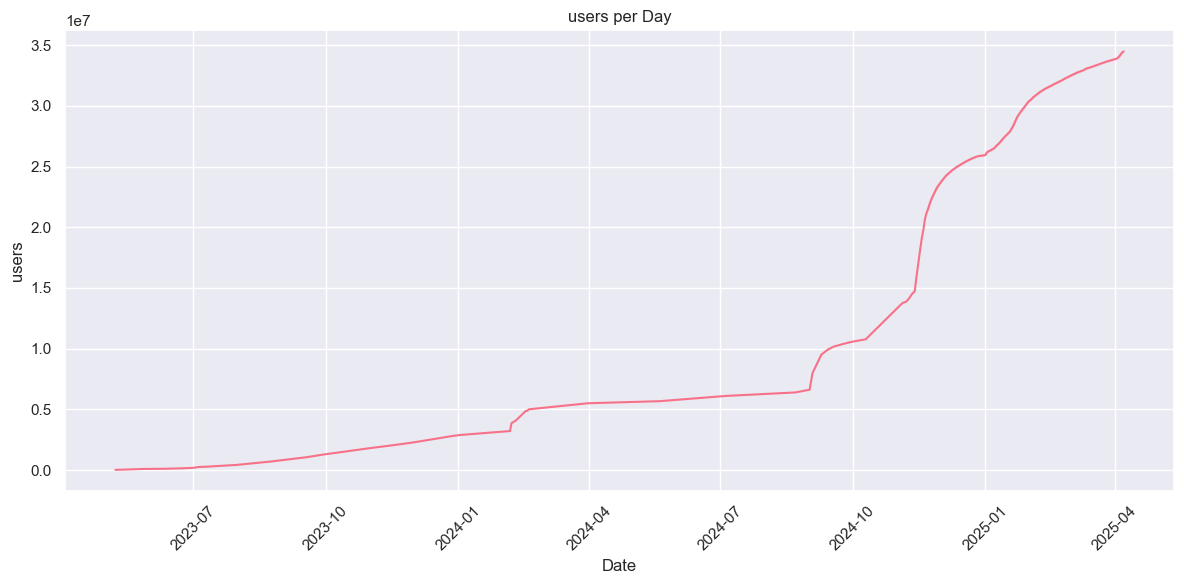

In [18]:
ep.date_var_plot(df,'users', save='True', filename='users_per_day')

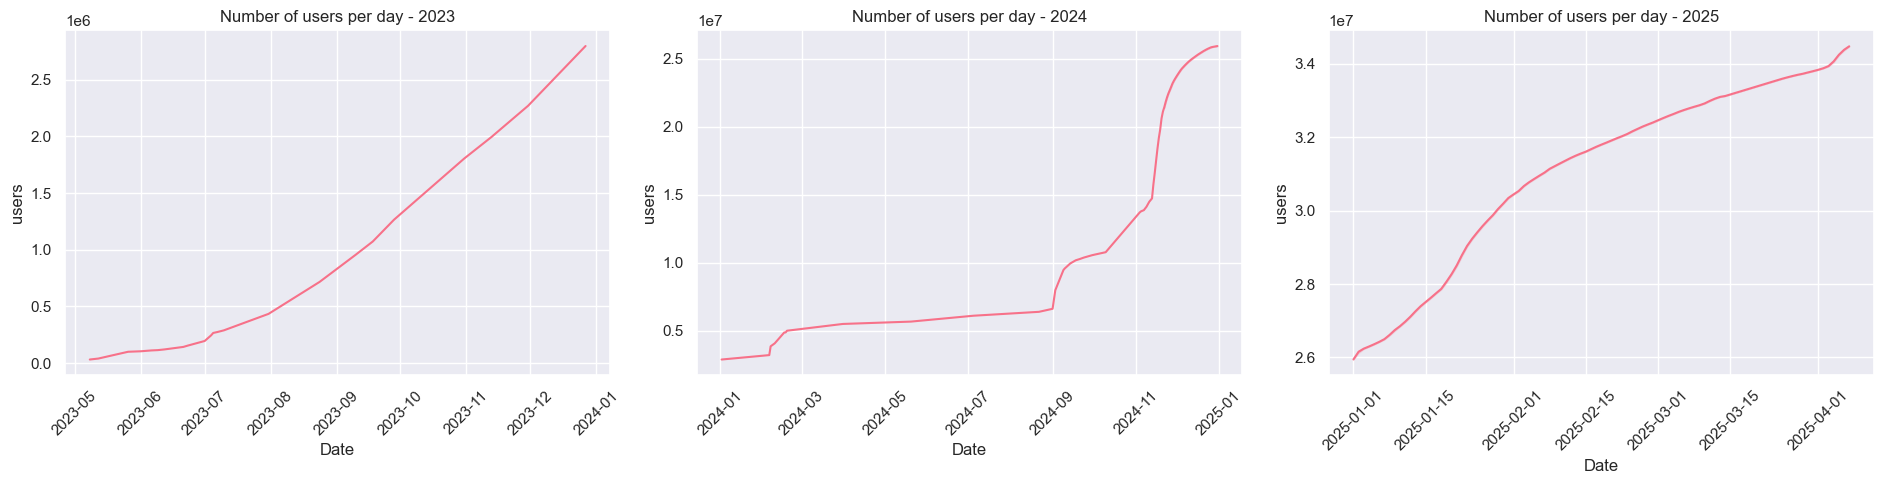

In [23]:
ep.var_per_day_per_year(df,'users', save=True, filename='Number of users per day per year')

#### Date
Este análisis es muy interesante porque demuestra que hasta finales de 2024 se hacía un único registro al día y a partir de ahí nos encontramos con varios registros diarios, con un pico muy fuerte en 2025.

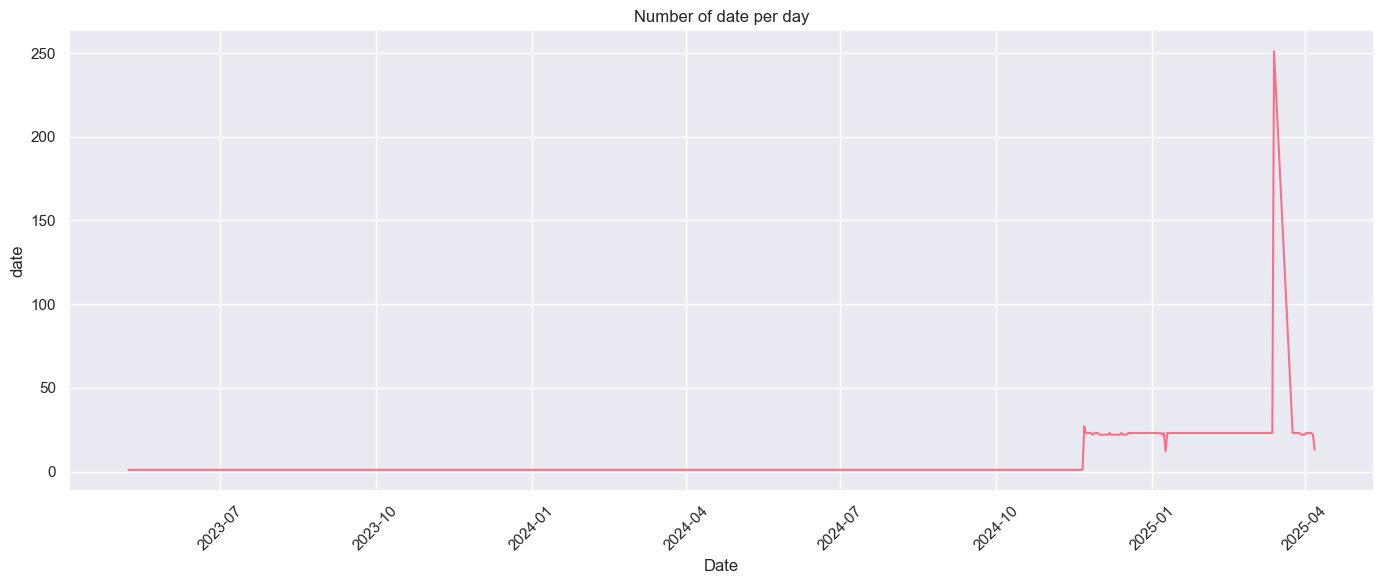

In [30]:
# Count how many records per day
date_counts = df['date'].value_counts().sort_index()
ep.var_per_day(date_counts,'date')


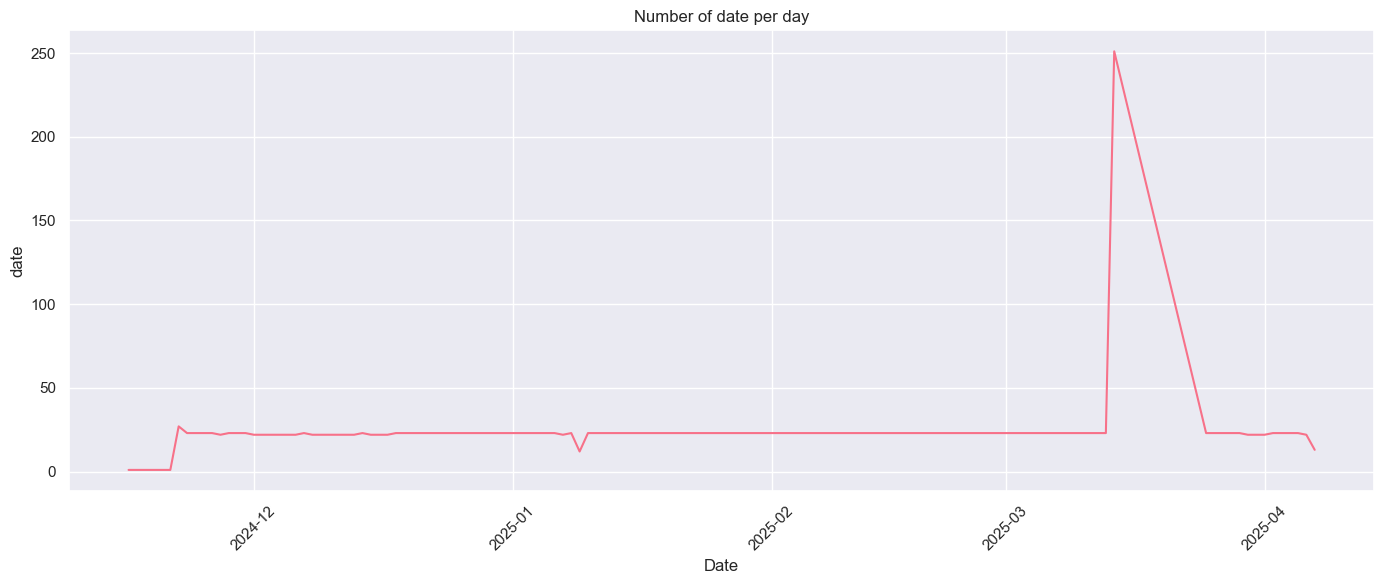

In [31]:
# Count how many records per day from 2024-11
date_counts = df[df['date'] > '2024-11-15']['date'].value_counts().sort_index()
ep.var_per_day(date_counts,'date')


In [32]:
# Buscamos el pico de registros cuándo se produce
df[df['date'] > '2024-11-30']['date'].value_counts() # 2025-03-14 - 251

# Vemos ese día
df[df['date'] == '2025-03-14']

# Parece una errata ya que los 251 registros se producen a la misma hora y tienen los mismos datos, se eliminan todos menos 1
index_to_drop = df[df['date'] == '2025-03-14'].index
len(index_to_drop), len(index_to_drop[1:251])
df.drop(index_to_drop[1:251], inplace=True)

In [33]:
# Con esto ya se ha normalizado el número de registro por días, estando la media en 23 cuando no es solo 1 por día

# Se detecta un día con 27 registros y se analiza
df[df['date'] > '2024-11-01']['date'].value_counts() # 2024-11-22    27

# se observa ese día
df[df['date'] == '2024-11-22']

# Son registros reales con horas y datos de usuarios actualizados, se deja

,date,year,month,day,time,users,num_likes,num_likers,num_posters,num_posts,num_posts_with_images,num_images,num_images_with_alt_text,num_follows,num_followers,num_blocks,num_blockers
61,2024-11-22,2024,11,22,01:17:51,21284400,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280
62,2024-11-22,2024,11,22,01:30:58,21287962,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280
63,2024-11-22,2024,11,22,02:44:56,21306599,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280
64,2024-11-22,2024,11,22,02:48:54,21307541,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280
65,2024-11-22,2024,11,22,02:54:52,21309019,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280
66,2024-11-22,2024,11,22,03:03:51,21311221,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280
67,2024-11-22,2024,11,22,03:29:55,21317283,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280
68,2024-11-22,2024,11,22,04:20:51,21329523,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280
69,2024-11-22,2024,11,22,05:16:53,21341988,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280
70,2024-11-22,2024,11,22,06:24:59,21356250,39764731,2602672,1376927,6876622,1143758,1472630,207889,30777839,2401238,1224185,275280


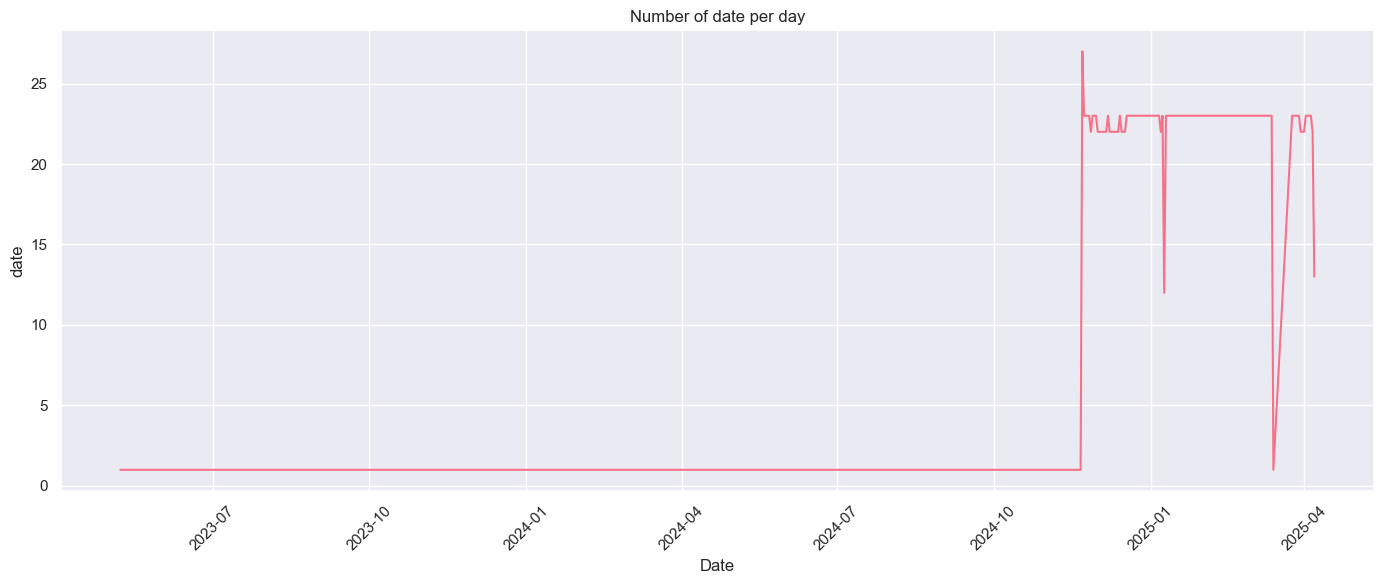

In [34]:
# Count how many records per day from 2024-11
date_counts = df['date'].value_counts().sort_index()
ep.var_per_day(date_counts,'date')


#### Variables de actividad
['num_likes', 'num_likers', 'num_posters', 'num_posts', 'num_posts_with_images', 'num_images', 'num_images_with_alt_text', 'num_follows', 'num_followers', 'num_blocks', 'num_blockers']

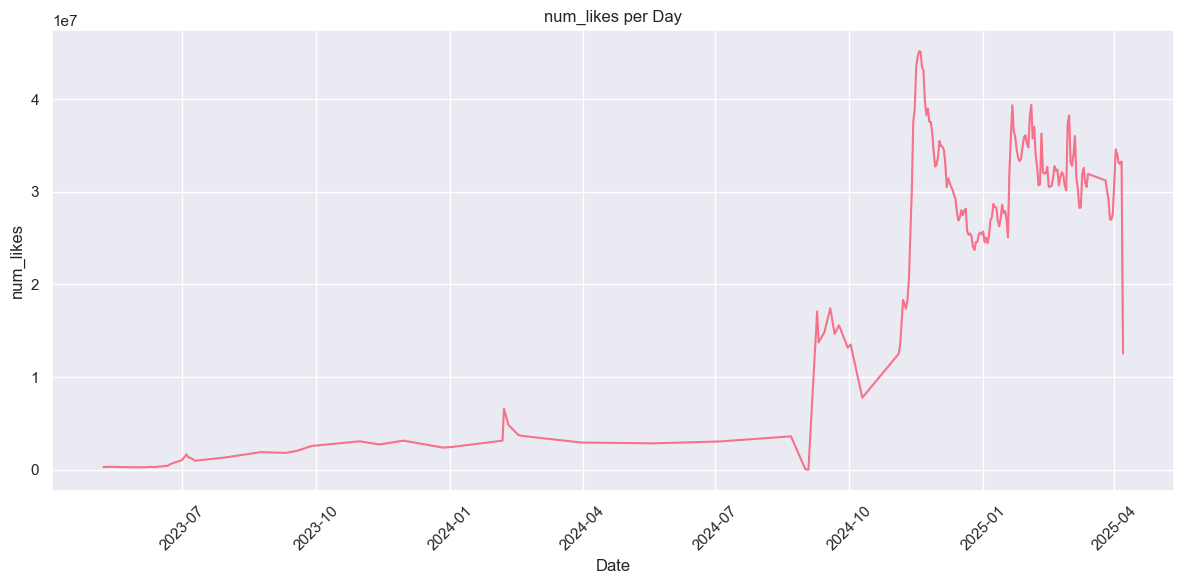

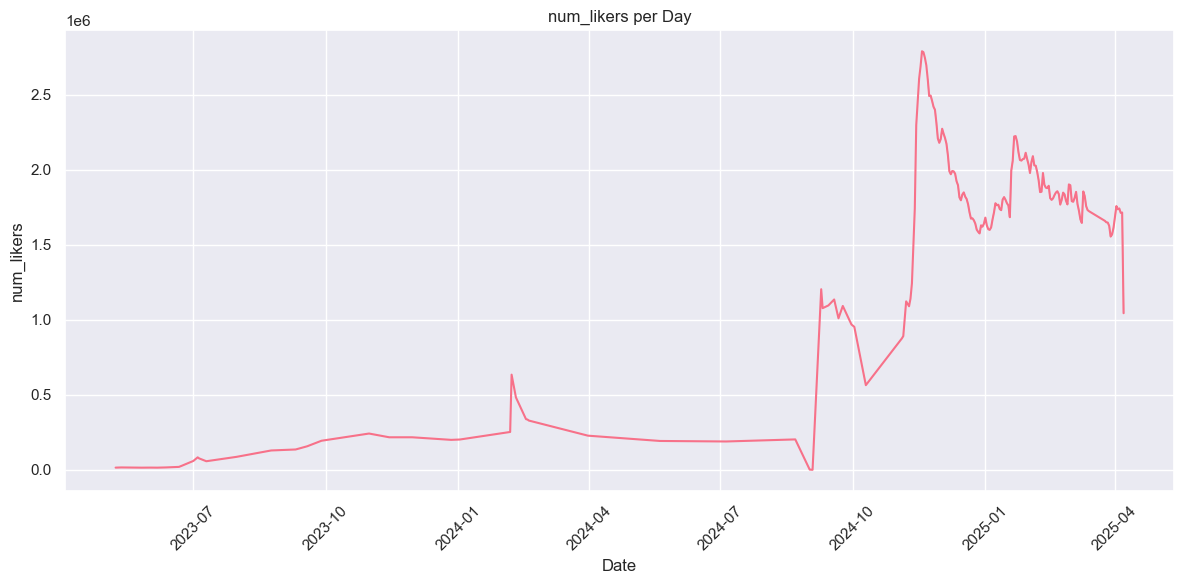

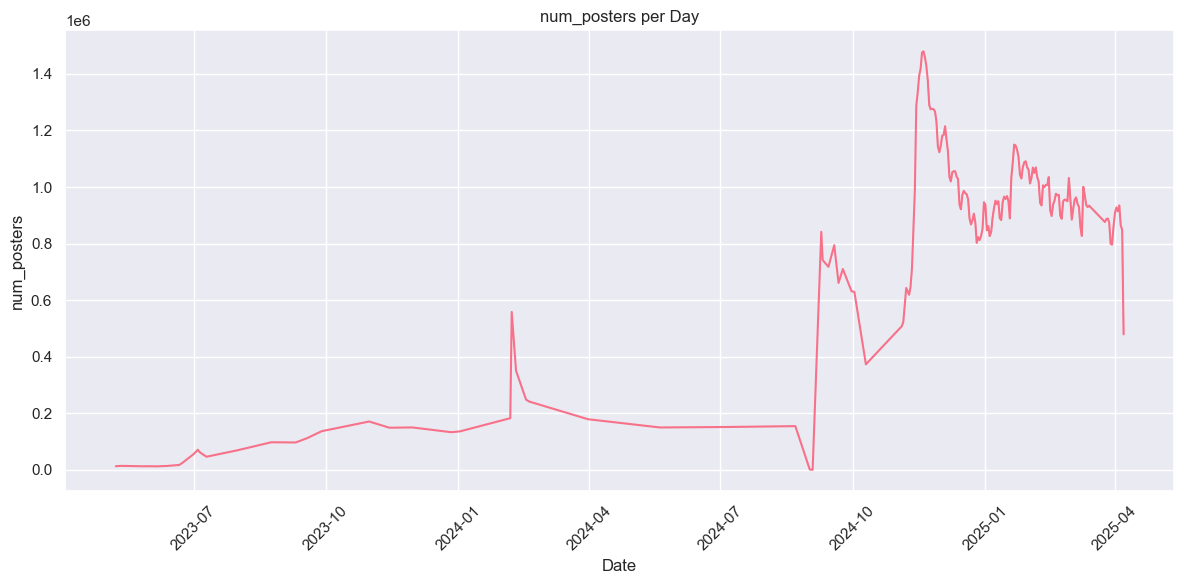

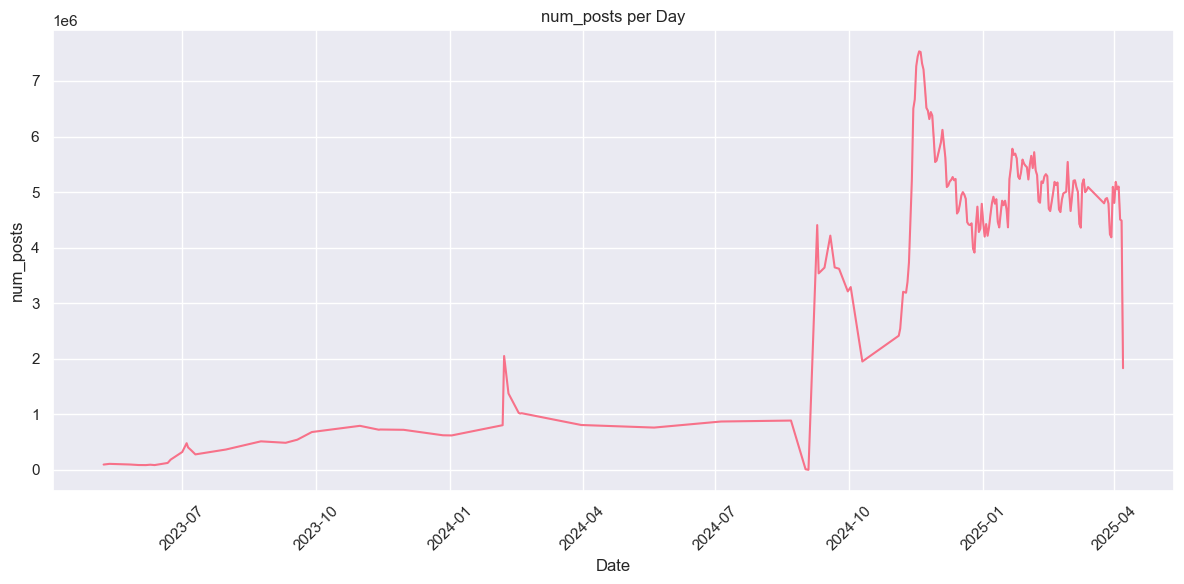

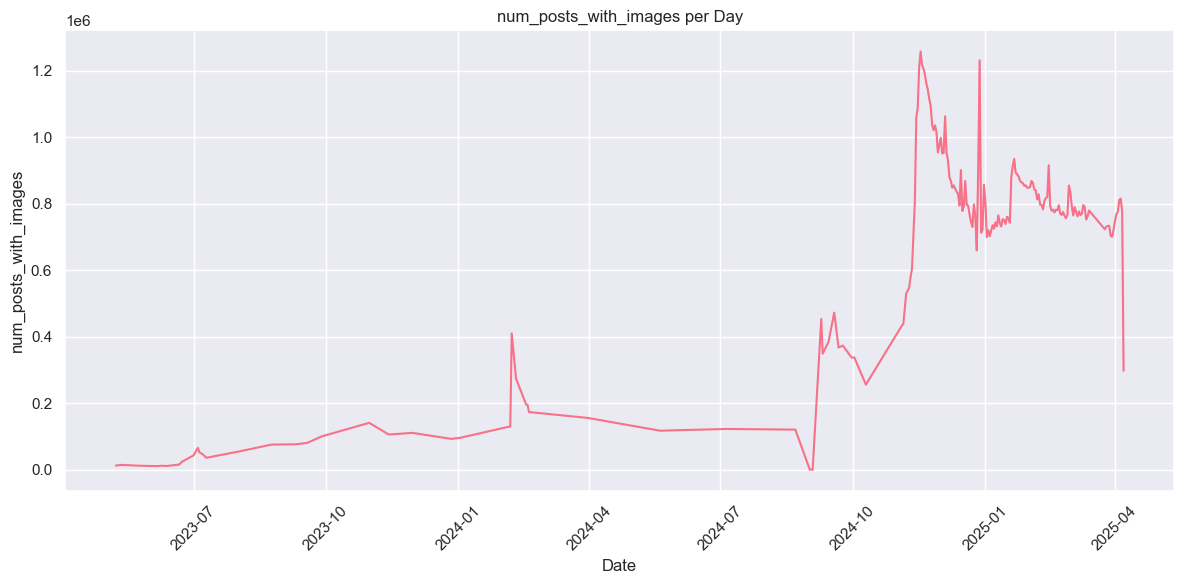

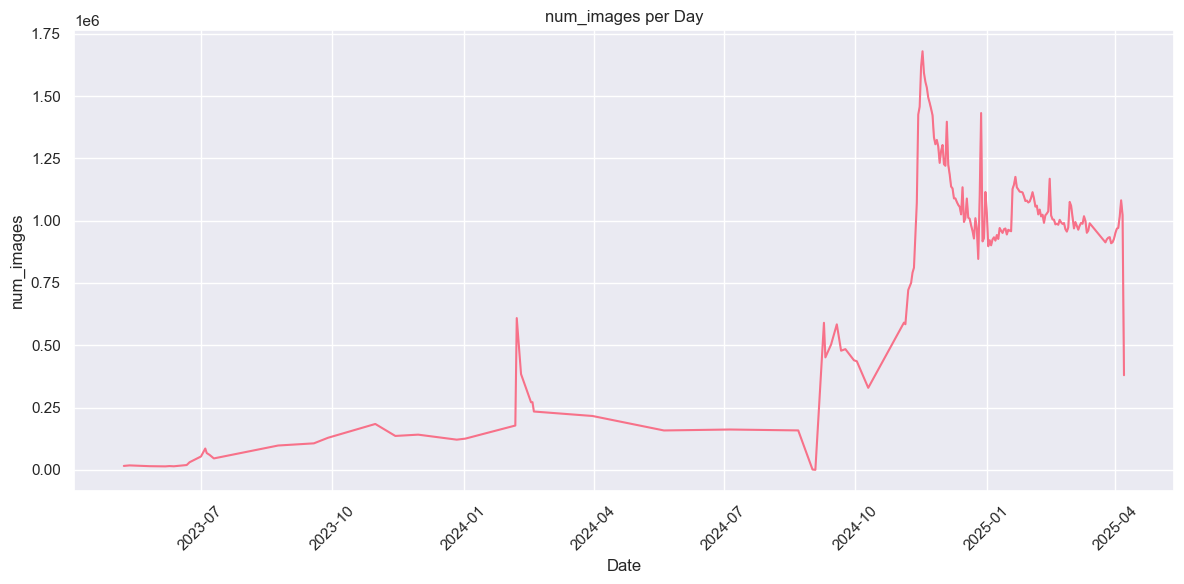

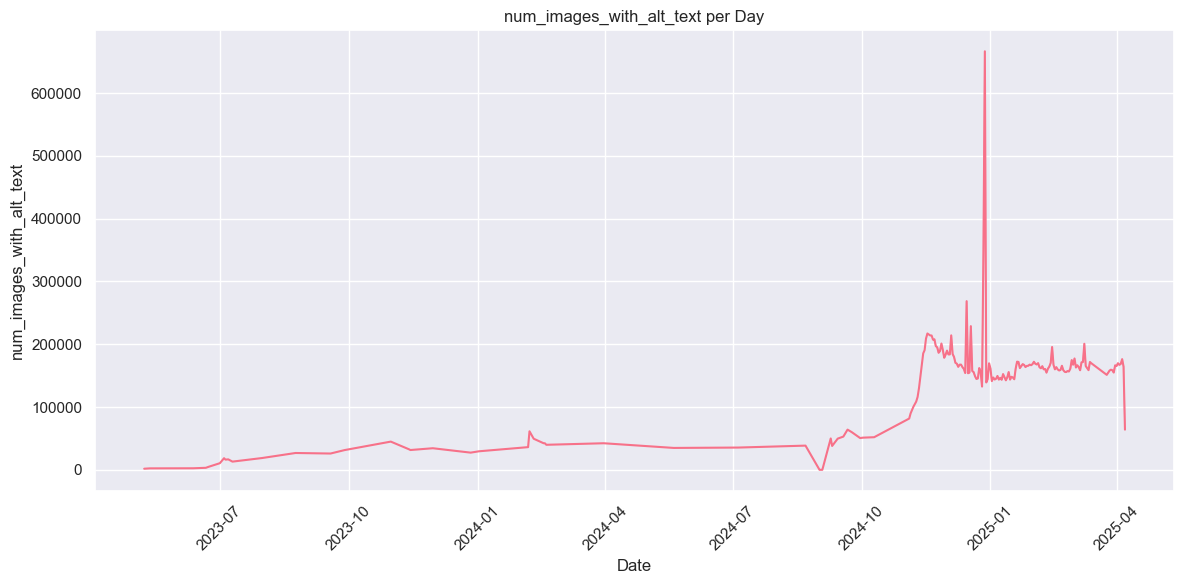

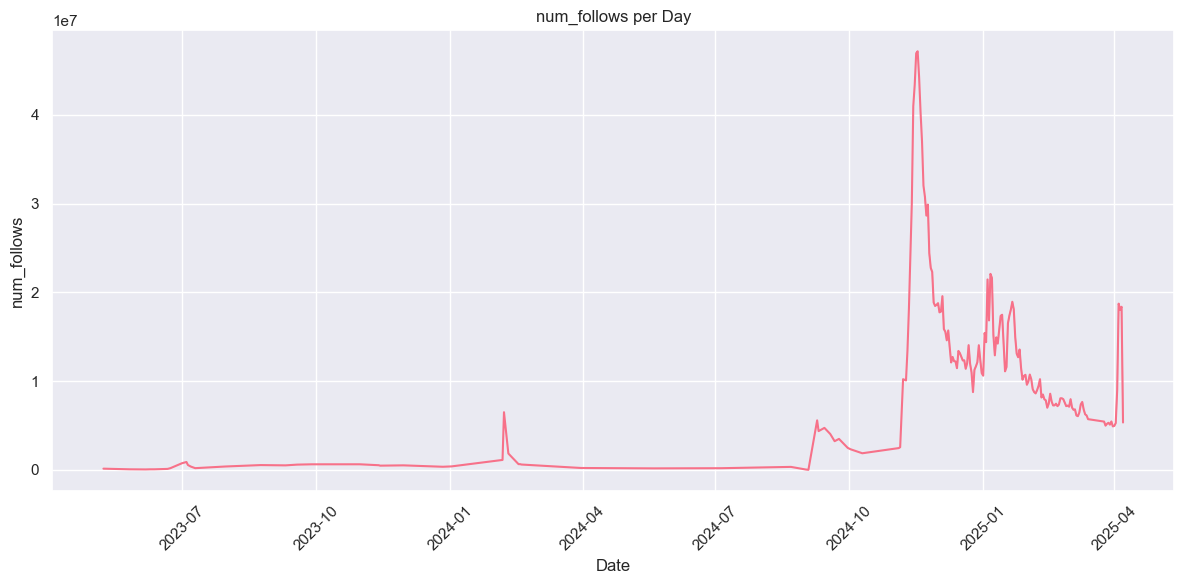

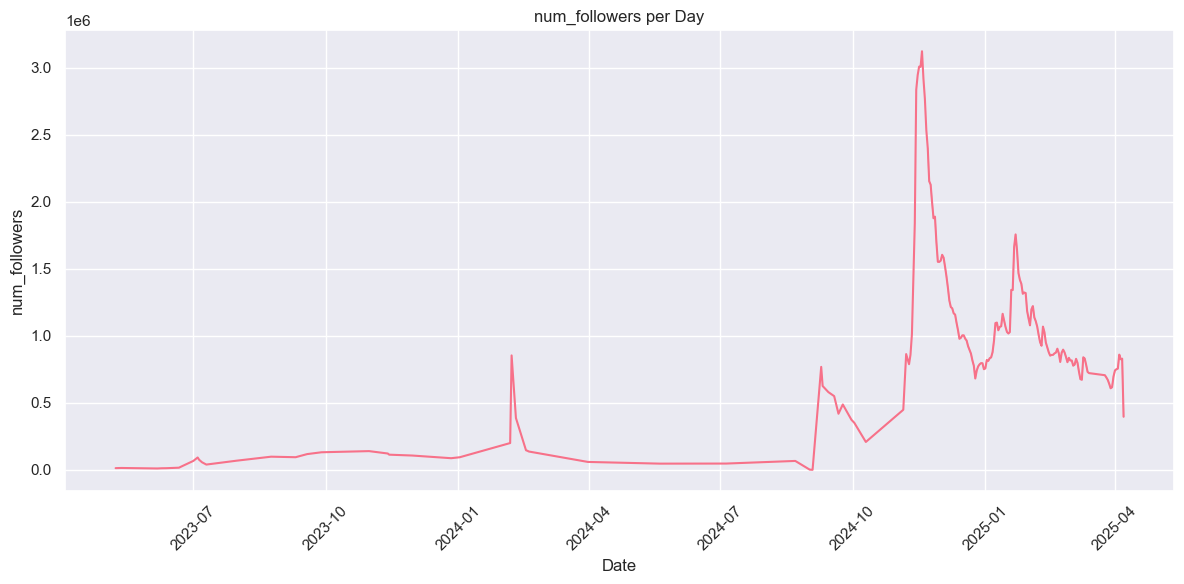

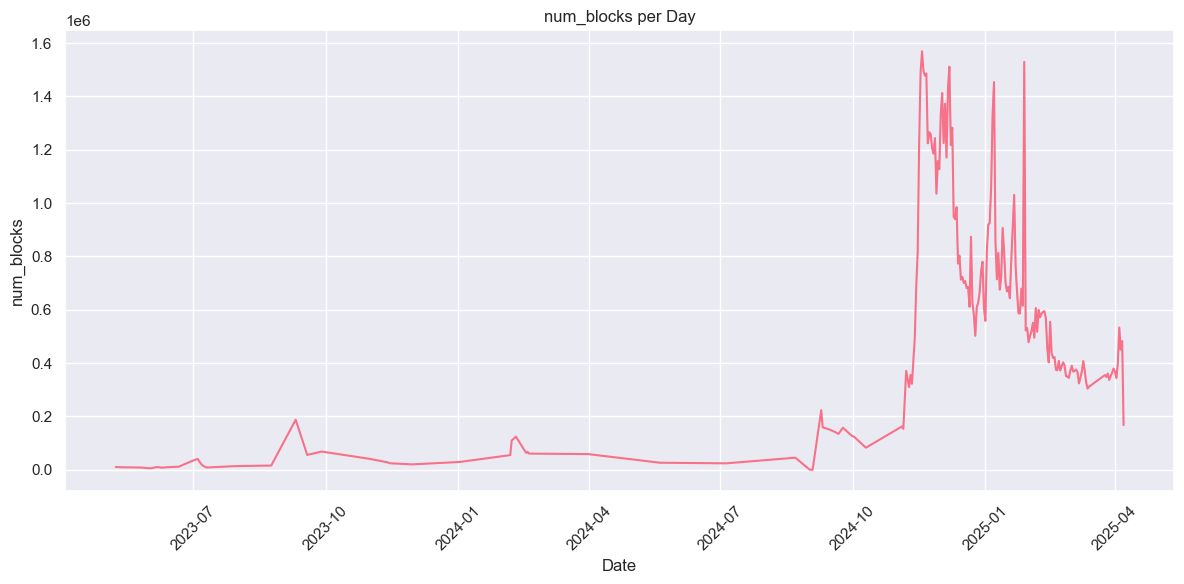

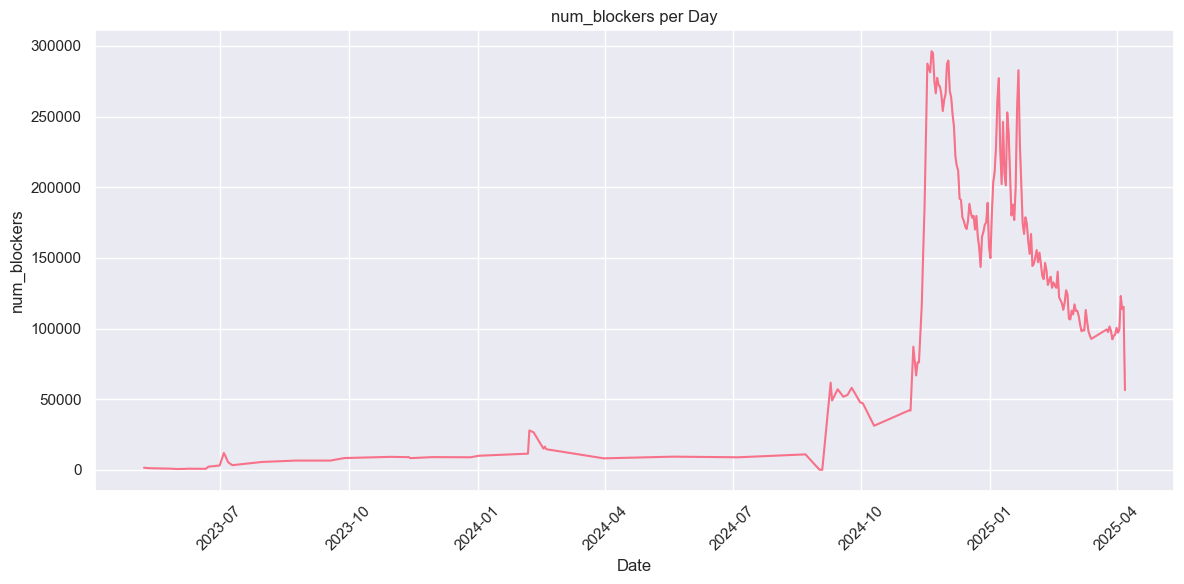

In [53]:
activity_var = ['num_likes', 'num_likers', 'num_posters', 'num_posts', 'num_posts_with_images', 'num_images', 'num_images_with_alt_text', 'num_follows', 'num_followers', 'num_blocks', 'num_blockers']

for var in activity_var:
    ep.date_var_plot(df,var, save=True, filename=var)

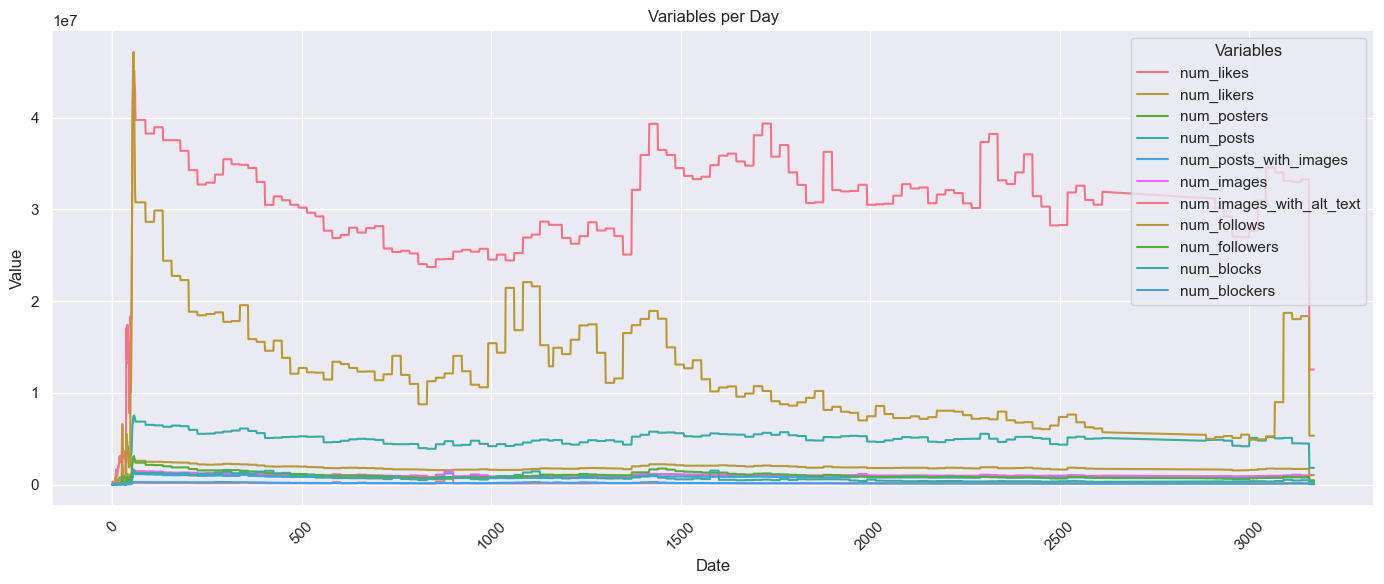

In [57]:
activity_var = ['num_likes', 'num_likers', 'num_posters', 'num_posts', 'num_posts_with_images', 'num_images', 'num_images_with_alt_text', 'num_follows', 'num_followers', 'num_blocks', 'num_blockers']

ep.vars_per_day_multivar(df,activity_var, save=True, filename='Activity Stats')

#### Conclusiones
- Todas las variables de actividad tienen una distribución muy similar, lo que facilita la búsqueda de outliers.
- Se detecta un pico disonante en la publicación de imágenes en torno a diciembre de 2024, es probable que corresponda a la Navidad.
- Llama la atención el comportamiento de los bloqueos en 2025, ya que el resto de los años se mantienen acorde al resto de actividad. No hay noticias de cambios en el sistema de bloqueo de Bluesky.
- Viendo la distribución, nos podemos quedar con una variable por par (likes/likers...)
- Se decide eliminar la variable 'num_images_with_alt_text' por ser poco relevante

In [25]:
df.drop(columns = (['num_likers', 'num_posters', 'num_posts_with_images', 'num_images_with_alt_text', 'num_followers', 'num_blockers']), inplace=True)

### Users per day
Queremos ver si compensa tener más de un registro diario del número de usuarios, para lo que sacamos el número de usuarios nuevos en cada registro y el número de usuarios nuevos por día.

In [27]:
# Sacamos una nueva columna con la diferencia de usuarios de un registro a otro (sin importar el día del registro)
df['new_users'] = df['users'].diff()

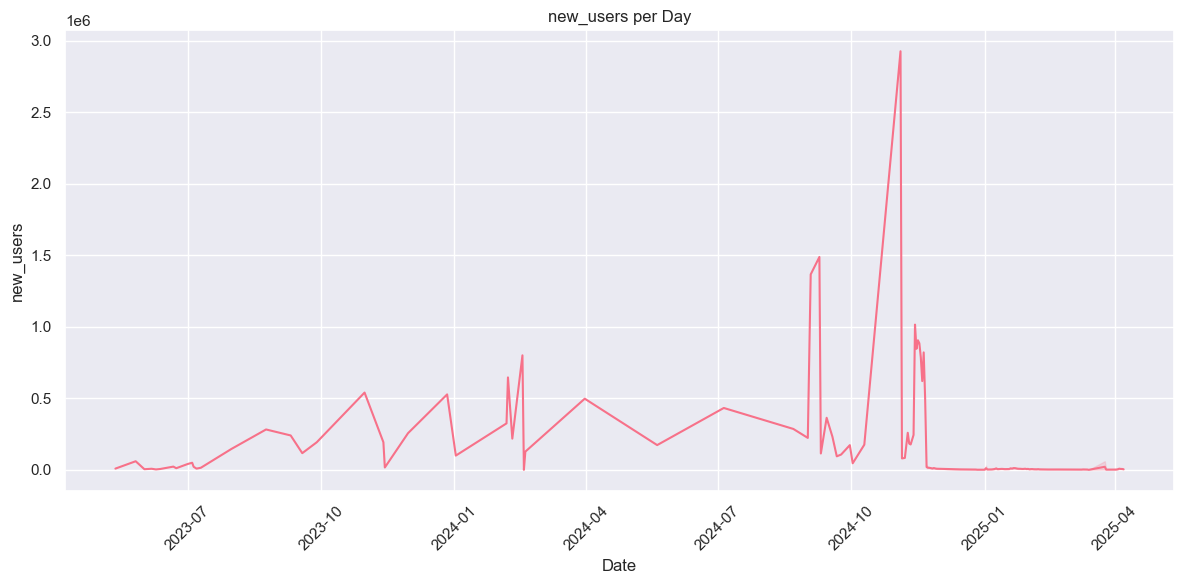

In [29]:
ep.date_var_plot(df,'new_users')

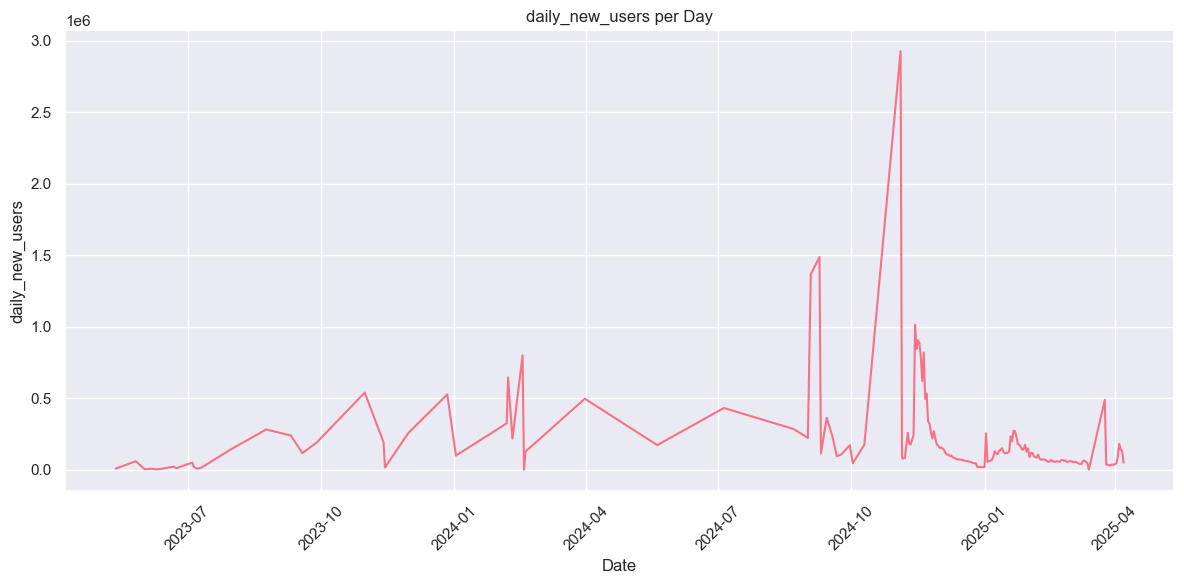

In [31]:
# New users per day
daily_max = df.groupby('date')['users'].max().sort_index()
daily_new_users = daily_max.diff()
daily_growth = daily_new_users.reset_index(name='daily_new_users')
ep.date_var_plot(daily_growth,'daily_new_users')

Vemos que en 2025 que es cuando más registros por día tenemos, se aprecia peor el crecimiento diario si mantenemos los registros por horas, no habiendo en ellos ningún pico significativo que nos indique que debemos mantenerlos.

- Los registros por hora solo recogen el número de usuarios. 
- Se decide eliminar los registros redundantes eligiendo el máx. número de usuarios como registro del día.

In [33]:
df_daily = df.loc[df.groupby('date')['users'].idxmax()]
df_daily.drop(columns = ('time'), inplace = True)

In [35]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 3171
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         188 non-null    datetime64[ns]
 1   year         188 non-null    int64         
 2   month        188 non-null    int64         
 3   day          188 non-null    int64         
 4   users        188 non-null    int64         
 5   num_likes    188 non-null    int64         
 6   num_posts    188 non-null    int64         
 7   num_images   188 non-null    int64         
 8   num_follows  188 non-null    int64         
 9   num_blocks   188 non-null    int64         
 10  new_users    187 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 17.6 KB


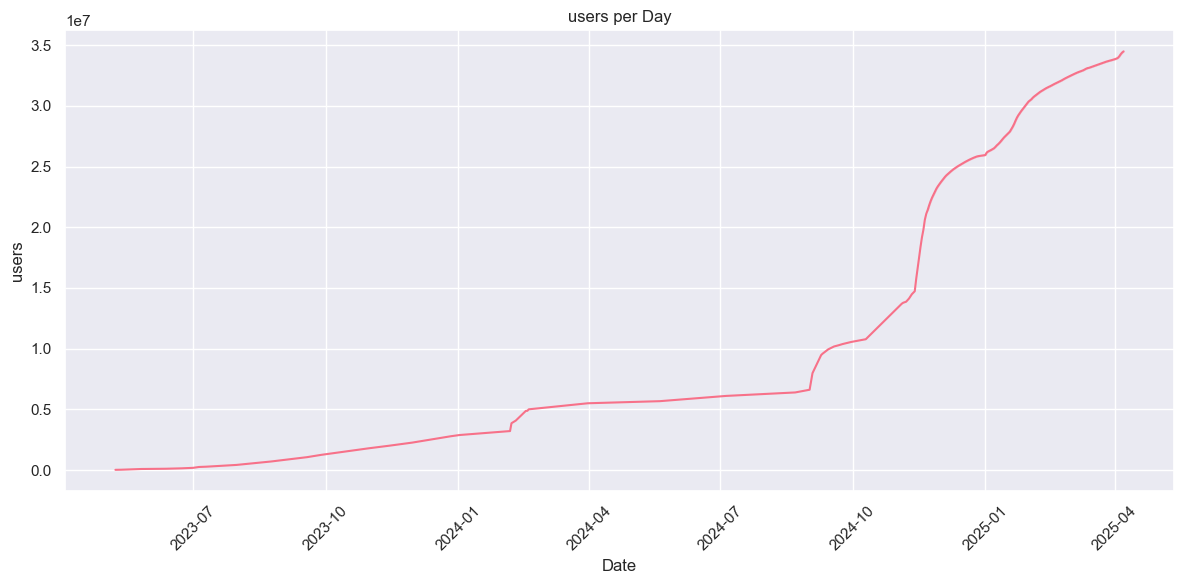

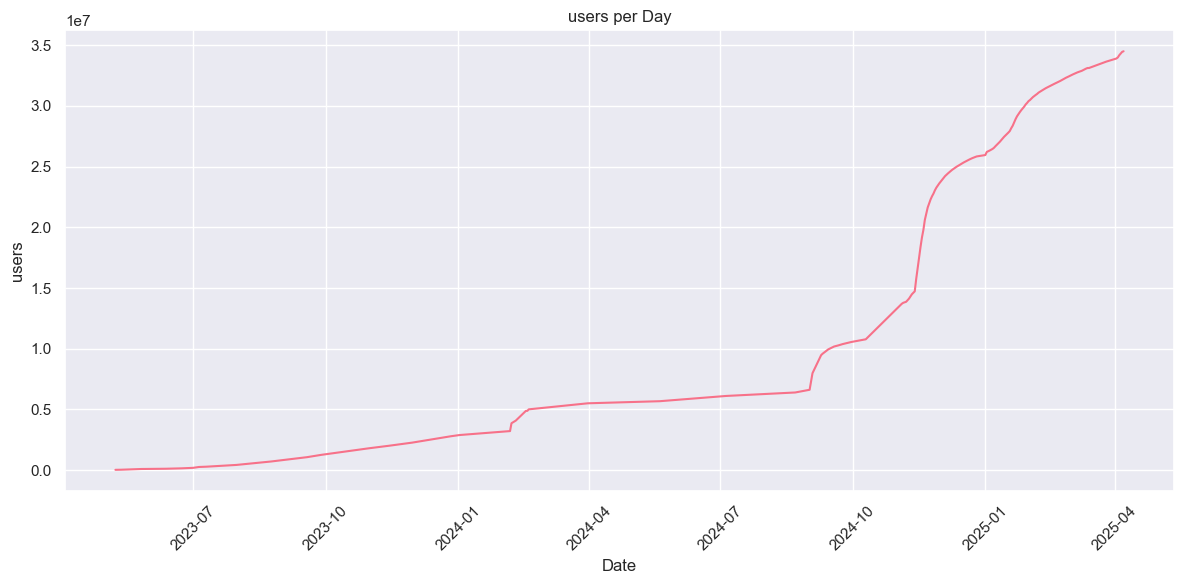

In [37]:
# Comprobamos que no hay diferencias entre ambas gráficas
ep.date_var_plot(df,'users')
ep.date_var_plot(df_daily,'users')


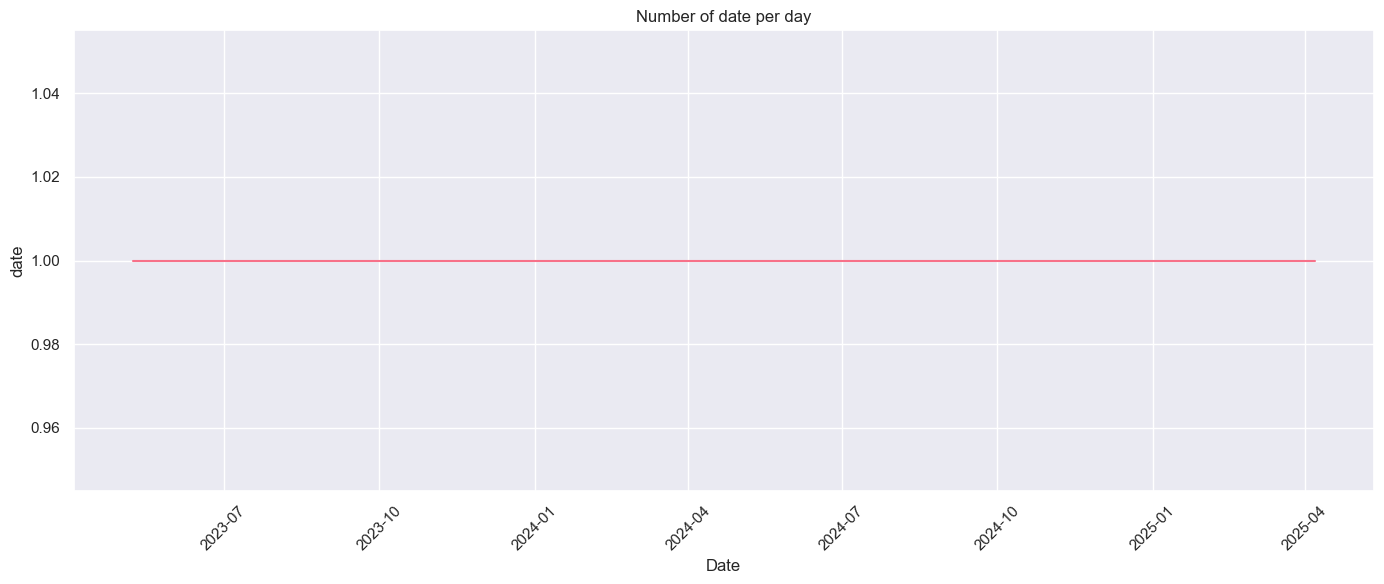

In [39]:
# Nos queda un registro por día, sin saltos
date_counts_daily = df_daily['date'].value_counts().sort_index()
ep.var_per_day(date_counts_daily,'date')

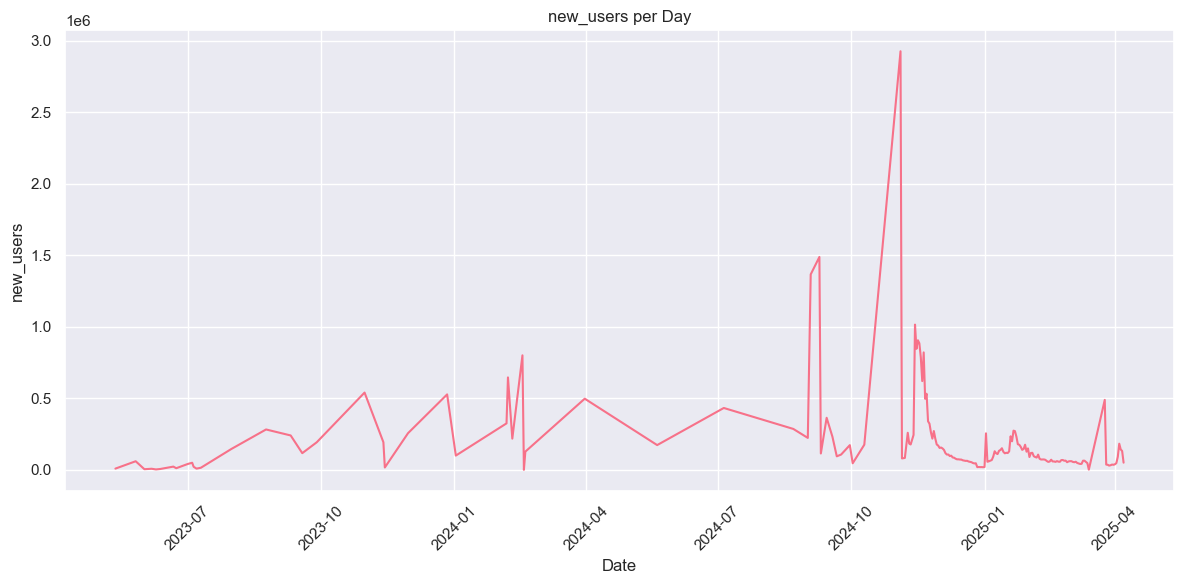

In [41]:
# Reajustamos la columna new_users para que recoja los saltos diarios en vez de por horas
df_daily['new_users'] = df_daily['users'].diff()
ep.date_var_plot(df_daily,'new_users')


In [43]:
# Cambiamos el primer NaN que queda de los new_users por 0 (no tenemos datos)
df_daily['new_users'] = df_daily['new_users'].fillna(0)

In [45]:
# Regorganizamos columnas
df_daily = df_daily[['date', 'year', 'month', 'day', 'users', 'new_users', 'num_likes', 'num_posts', 'num_images', 'num_follows', 'num_blocks']]

In [47]:
df_daily.describe()

,date,year,month,day,users,new_users,num_likes,num_posts,num_images,num_follows,num_blocks
count,188,188.000000,188.000000,188.000000,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02
mean,2024-10-16 19:24:15.319149056,2024.335106,6.031915,15.053191,2.177800e+07,1.833543e+05,2.455955e+07,4.111258e+06,8.462167e+05,1.068169e+07,5.426475e+05
min,2023-05-08 00:00:00,2023.000000,1.000000,1.000000,3.152200e+04,0.000000e+00,2.402000e+03,1.255000e+03,1.090000e+02,2.737000e+03,1.000000e+01
25%,2024-11-04 18:00:00,2024.000000,2.000000,7.000000,1.376662e+07,5.576450e+04,1.671593e+07,3.599572e+06,5.905755e+05,4.934027e+06,1.828590e+05
50%,2024-12-24 12:00:00,2024.000000,4.000000,14.000000,2.577230e+07,9.155700e+04,2.895198e+07,4.804870e+06,9.795835e+05,8.870325e+06,4.805365e+05
75%,2025-02-09 06:00:00,2025.000000,11.000000,23.000000,3.126678e+07,1.775202e+05,3.313253e+07,5.236156e+06,1.079037e+06,1.437864e+07,7.486600e+05
max,2025-04-07 00:00:00,2025.000000,12.000000,31.000000,3.450212e+07,2.925196e+06,4.515699e+07,7.533473e+06,1.679585e+06,4.716763e+07,1.569325e+06
std,NaN,0.693315,4.370421,9.129335,1.134755e+07,3.024094e+05,1.282348e+07,1.971820e+06,4.193331e+05,9.434084e+06,4.172871e+05


#### Análisis por año
Con el nuevo dataframe, hacemos un análisis de las variables por año, solo de las más relevantes: 'users', 'new_users', 'num_likes' (esta última como representante de la actividad)

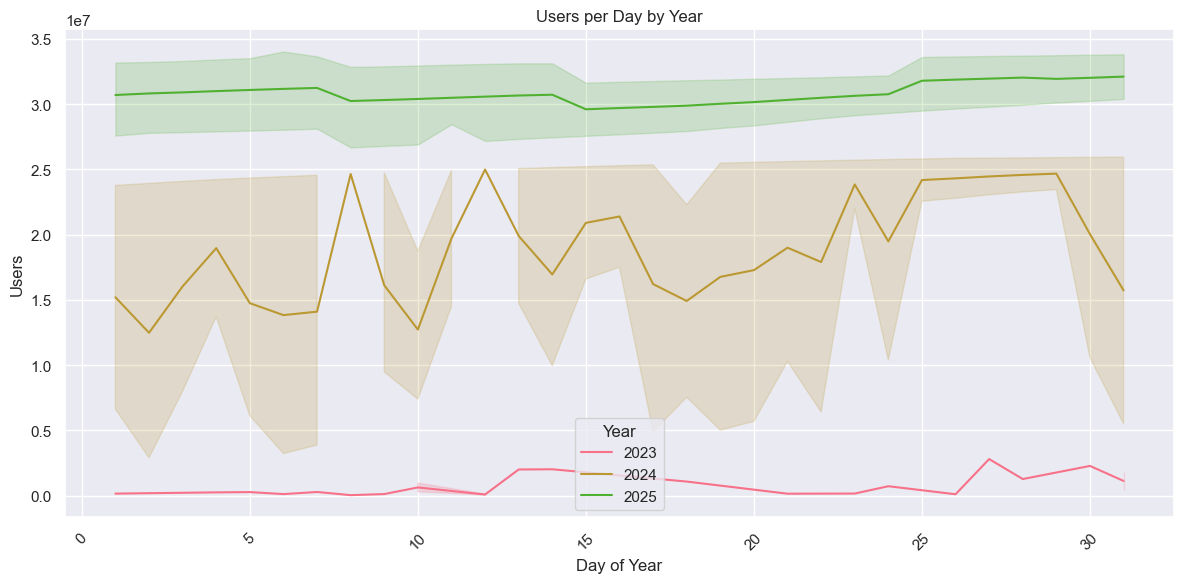

In [51]:
# Users per Day by Year
plt.figure(figsize=(12, 6))

for year in df_daily.year.unique():
    subset = df_daily[df_daily['year'] == year]
    sns.lineplot(data=subset, x='day', y='users', label=str(year))

plt.title('Users per Day by Year')
plt.xlabel('Day of Year')
plt.ylabel('Users')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.savefig('Users_day_year.png')
plt.show()

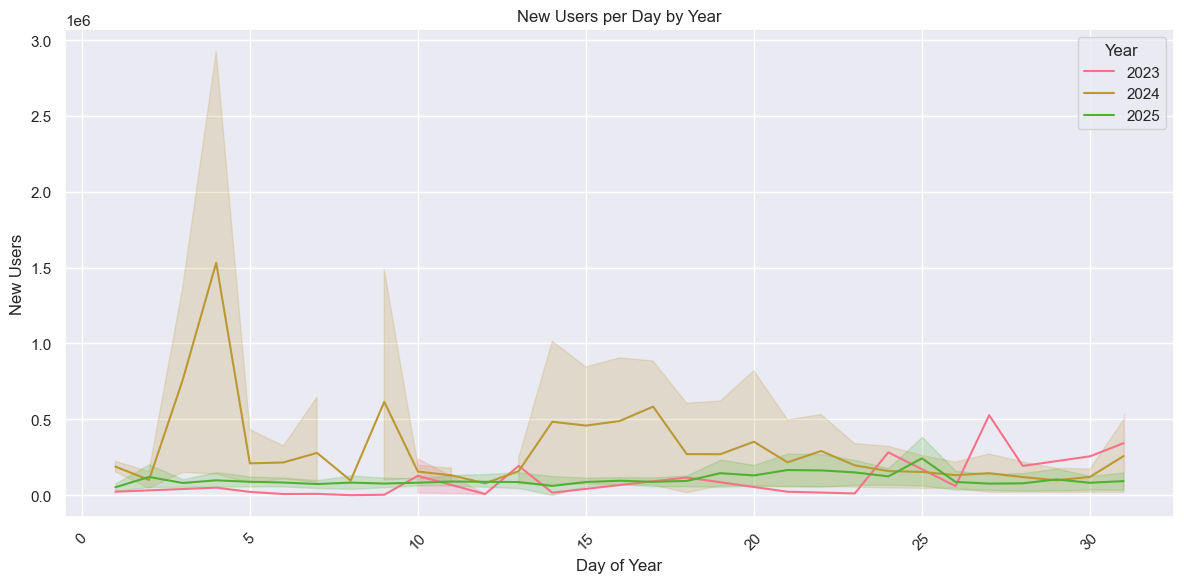

In [63]:
# New Users per Day by Year
plt.figure(figsize=(12, 6))

for year in df_daily.year.unique():
    subset = df_daily[df_daily['year'] == year]
    sns.lineplot(data=subset, x='day', y='new_users', label=str(year))

plt.title('New Users per Day by Year')
plt.xlabel('Day of Year')
plt.ylabel('New Users')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.savefig('new_users_per_day_year.png')
plt.show()

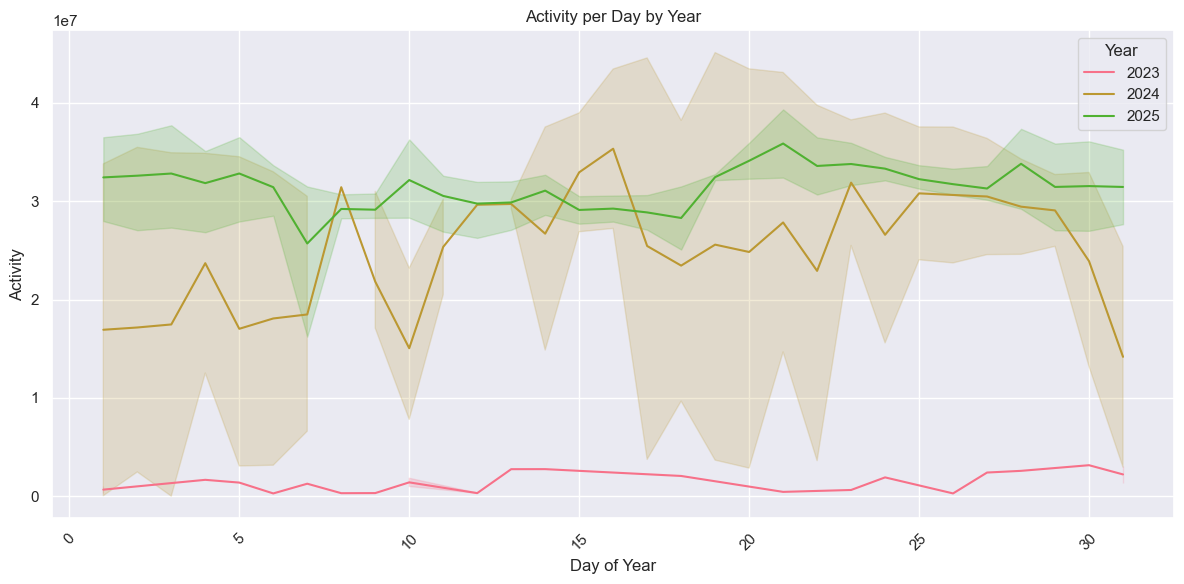

In [61]:
# Activity per Day by Year
plt.figure(figsize=(12, 6))

for year in df_daily.year.unique():
    subset = df_daily[df_daily['year'] == year]
    sns.lineplot(data=subset, x='day', y='num_likes', label=str(year))

plt.title('Activity per Day by Year')
plt.xlabel('Day of Year')
plt.ylabel('Activity')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.savefig('activity_day_year.png')

plt.show()

#### Conclusiones
- En 2023 se observa un crecimiento homogéneo, tanto de usuarios como en la actividad de la plataforma.
- 2024 es el año que más cambios bruscos presenta, teniendo el mayor pico de nuevos usuarios y actividad en noviembre. Es un pico de crecimiento muy puntual que no mantiene el ritmo, con un total de más de 2.9M de usuarios nuevos en solo un día.

In [ ]:
df_daily.info()

## Nuevo dataset
Con todas las conclusiones anteriores aplicamos el preprocesamiento a ambos dataset (con y sin serie temporal).
El dataset final queda con la siguiente estructura:
- 701 registros (serie temporal)
- 188 registros (sin serie temporal)
- 11 columnas:
  - **date**: fecha en formato Y-m-d, va desde 2023-05-08 hasta 2025-04-07
  - **year**: año en que se hace el registro, va desde 2023 hasta 2025, 2 años
  - **month**: mes en que se hace el registro, va desde mayo de 2023 hasta abril 2025, 23 meses
  - **day**: día del mes en que se hace el registro
  - **users**: total agregado de usuarios por día
  - **new_users**: número de nuevos usuarios por día
  - **num_likes**: cantidad de likes que se registran en total en la plataforma ese día
  - **num_posts**: cantidad de posts que se han publicado en total ese día en la plataforma
  - **num_images**: cantidad de imágenes que se han publicado en total ese día en la plataforma
  - **num_follows**: cantidad de follows que se han hecho en total ese día en la plataforma
  - **num_blocks**: cantidad de bloqueos que se han hecho en total ese día en la plataforma


In [ ]:
df_daily.to_csv('bsky_data.csv', index = False)

In [ ]:
df_temp = pd.read_csv('blsk_users_activity_stats_temp.csv')

In [ ]:
df_temp = pre.preprocessing_bsky_df(df_temp)

In [ ]:
df_temp.to_csv('bsky_data_temp.csv', index = False)